### Generate Dataset using normal-distribution

In [1]:
# Base Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [5]:
def getData():
    df = pd.read_csv('/home/mrz/MyDrive/Education/Deep-Learning/Codes/LogisticRegression/data.csv')

    # just in case you're curious what's in it
    # df.head()

    # easier to work with numpy array
    data = df.values

    # shuffle it
    np.random.shuffle(data)

    # split features and labels
    X = data[:,:-1]
    Y = data[:,-1].astype(np.int32)

    # one-hot encode the categorical data
    # create a new matrix X2 with the correct number of columns
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)] # non-categorical

    # one-hot
    for n in range(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1

    # method 2
    # Z = np.zeros((N, 4))
    # Z[np.arange(N), X[:,D-1].astype(np.int32)] = 1
    # # assign: X2[:,-4:] = Z
    # assert(np.abs(X2[:,-4:] - Z).sum() < 1e-10)

    # assign X2 back to X, since we don't need original anymore
    X = X2

    # split train and test
    Xtrain = X[:-100]
    Ytrain = Y[:-100]
    Xtest = X[-100:]
    Ytest = Y[-100:]

  # normalize columns 1 and 2
    for i in (1, 2):
        m = Xtrain[:,i].mean()
        s = Xtrain[:,i].std()
        Xtrain[:,i] = (Xtrain[:,i] - m) / s
        Xtest[:,i] = (Xtest[:,i] - m) / s

    return Xtrain, Ytrain, Xtest, Ytest

In [33]:
def oneZeroEncoding(y):
    N = len(y)
    K = len(set(y))
    
    index = np.zeros(shape=(N, K), dtype=int)
    
    for i, value in enumerate(y):
        index[i, value] = 1
        
    return index

def cost(Y, Yp):
    return -(Y * np.log(Yp)).sum()

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

def accuracy(Y, Yp):
    return 1.0 - errorRate(Y, Yp)

def errorRate(Y, Yp):
    return np.mean(Y != Yp)

def forward(X, W, b):
    return softmax(X.dot(W) + b)

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

In [34]:
Xtrain, Ytrain, Xtest, Ytest = getData()

D = Xtrain.shape[1]
K = len(set(Ytrain))
# convert to indicator
Ytrain_ind = oneZeroEncoding(Ytrain)
Ytest_ind = oneZeroEncoding(Ytest)

# randomly initialize weights
W = np.random.randn(D, K)
b = np.zeros(K)

0 1026.1625696280296 247.95503282348005
1000 135.17865081698972 41.521833266789585
2000 127.77424194873005 40.69504836233622
3000 124.95787385057956 40.641537446348934
4000 123.51592982619336 40.73998133752226
5000 122.65999322158805 40.86782709226584
6000 122.10400133681648 40.99336161088701
7000 121.72014908123897 41.10815408965302
8000 121.44320798769573 41.21072639810422
9000 121.23662816412494 41.3017565886066
Final train classification_rate: 0.9225
Final test classification_rate: 0.89


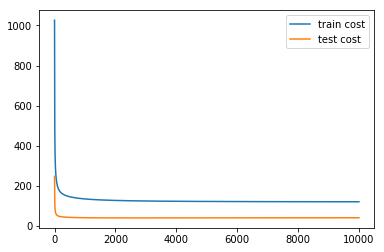

In [35]:
# train loop
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)

    ctrain = cost(Ytrain_ind, pYtrain)
    ctest = cost(Ytest_ind, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain_ind)
    b -= learning_rate*(pYtrain - Ytrain_ind).sum(axis=0)
    if i % 1000 == 0:
        print(i, ctrain, ctest)

print("Final train classification_rate:", accuracy(Ytrain, predict(pYtrain)))
print("Final test classification_rate:", accuracy(Ytest, predict(pYtest)))

plt.plot(train_costs, label='train cost')
plt.plot(test_costs, label='test cost')
plt.legend()
plt.show()